The CNN cannot identify or classify images that it has not been trained with but we can fix this using transfer learning. 

The second technique is to run all the training images through the base model for
feature extraction, and then run the features through a separate network containing
your classification layers

### Transfer Learning to Identify Artic Wildlife

In [1]:
import os
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
%matplotlib inline

def load_images_from_path(path, label):
    images, labels = [], []
    
    for file in os.listdir(path):
        img = image.load_img(os.path.join(path, file), target_size=(224, 224, 3))
        images.append(image.img_to_array(img))
        labels.append((label))
        
    return images, labels

def show_images(images):
    fig, axes = plt.subplots(1, 9, figsize=(20, 20), subplot_kw={'xticks': [], 'yticks': []})
    
    for i, ax in enumerate(axes.flat):
        ax.imshow(images[i]/ 255)

x_train, y_train, x_test, y_test = [], [], [], []

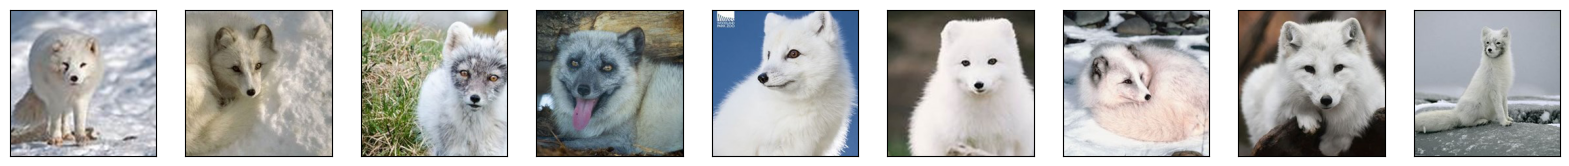

In [2]:
# Load 100 Artic fox training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/arctic_fox', 0)
x_train += images
y_train += labels

show_images(images)

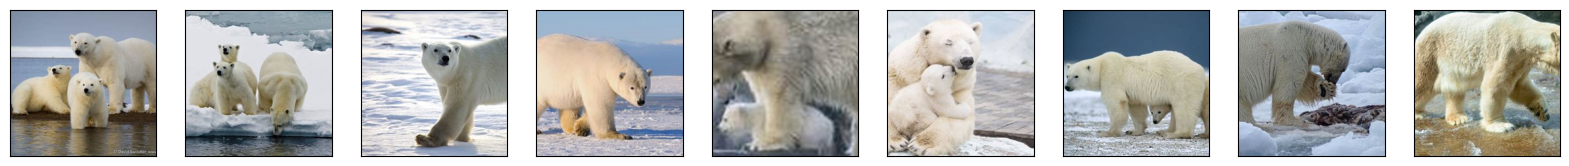

In [3]:
# Load 100 polar bear training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/polar_bear', 1)
x_train += images
y_train += labels

show_images(images)

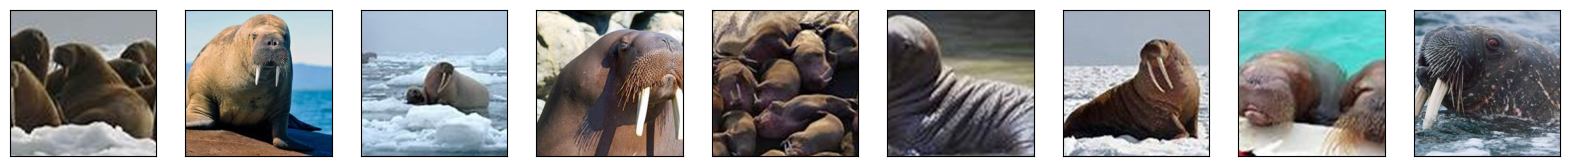

In [4]:
# Load 100 Walrus training images and plot a subset of them
images, labels = load_images_from_path('Data/arctic-wildlife/train/walrus', 2)
x_train += images
y_train += labels

show_images(images)

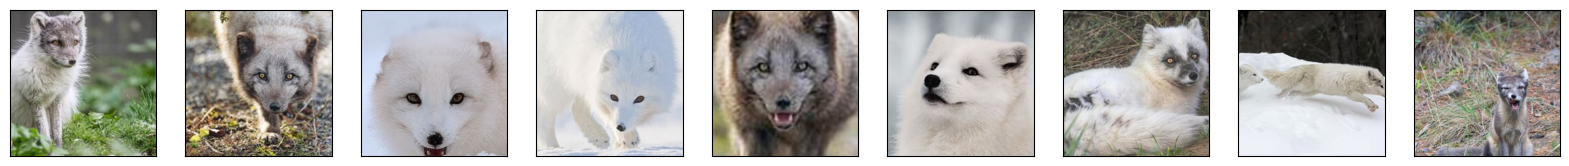

In [5]:
# Load images used to validate the CNN 
# Artic fox
images, labels = load_images_from_path('Data/arctic-wildlife/test/arctic_fox', 0)
x_test += images
y_test += labels

show_images(images)

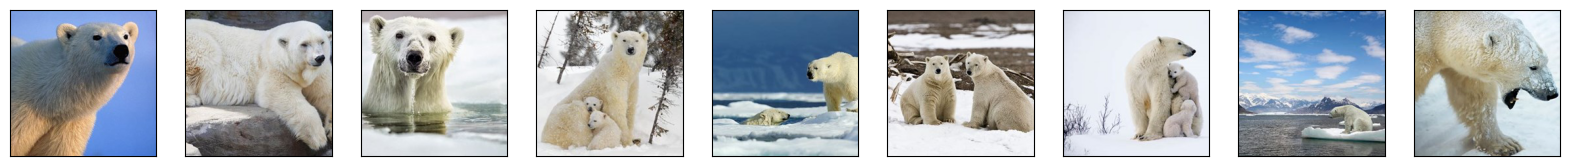

In [6]:
# Polar Bear
images, labels = load_images_from_path('Data/arctic-wildlife/test/polar_bear', 1)
x_test += images
y_test += labels

show_images(images)

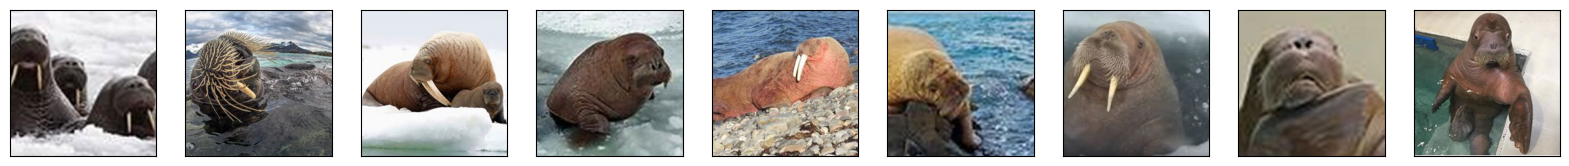

In [7]:
# Walrus
images, labels = load_images_from_path('Data/arctic-wildlife/test/walrus', 2)
x_test += images
y_test += labels

show_images(images)

In [8]:
# Normalize the training and testing images by dividing their pixel by 255
import numpy as np
from tensorflow.keras.applications.resnet50 import preprocess_input

x_train = preprocess_input(np.array(x_train)) / 255
x_test = preprocess_input(np.array(x_test)) / 255

y_train = np.array(y_train)
y_test = np.array(y_test)

In [9]:
# next we load ResNew50V2, we load only the bottleneck layers and not the classification layers (CP & PL)

from tensorflow.keras.applications import ResNet50V2

base_model = ResNet50V2(weights='imagenet', include_top=False)
x_train = base_model.predict(x_train)
x_test = base_model.predict(x_test)

2025-11-27 17:25:17.653926: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2025-11-27 17:25:17.654230: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-11-27 17:25:17.654255: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.92 GB
2025-11-27 17:25:17.654580: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-11-27 17:25:17.654602: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-11-27 17:25:20.498141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


10/10 ━━━━━━━━━━━━━━━━━━━━ 7s 410ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 411ms/step


In [10]:
# lets train neural network to classify features extracted from the training images
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

hist = model.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=10)

Epoch 1/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 121ms/step - accuracy: 0.8967 - loss: 19.0422 - val_accuracy: 0.9083 - val_loss: 17.4368
Epoch 2/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 98ms/step - accuracy: 0.9733 - loss: 3.9786 - val_accuracy: 0.9583 - val_loss: 17.1453
Epoch 3/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.9967 - loss: 0.0059 - val_accuracy: 0.9750 - val_loss: 12.0267
Epoch 4/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9667 - val_loss: 12.0649
Epoch 5/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9667 - val_loss: 12.0781
Epoch 6/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 95ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9667 - val_loss: 12.0787
Epoch 7/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 94ms/step - accuracy: 1.0000 - loss: 0.0000e+00 - val_accuracy: 0.9667 - val_loss: 12.0787
Epoch 8/10
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 99ms/step - accuracy: 1.0000 - loss: 0.0000e+

[]

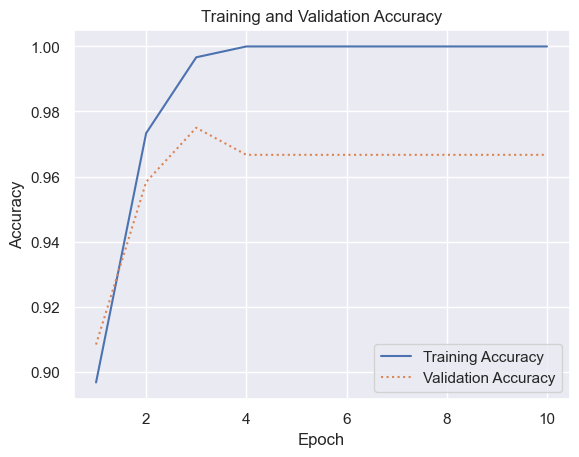

In [11]:
# lets plot the training and validation accuracy of the network

import seaborn as sns
sns.set_theme()

acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


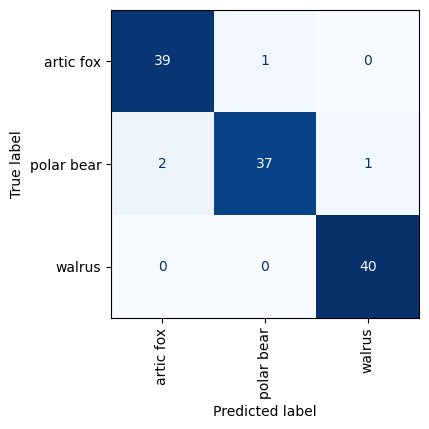

In [12]:
# lets use confusion matrix to visualize how well the network distinguishes betweek classes
from sklearn.metrics import ConfusionMatrixDisplay as cmd

sns.reset_orig()
fig, ax = plt.subplots(figsize=(4,4))
ax.grid(False)

y_pred = model.predict(x_test)
class_labels = ['artic fox', 'polar bear', 'walrus']

cmd.from_predictions(y_test, y_pred.argmax(axis=1), display_labels=class_labels, colorbar=False, cmap='Blues', xticks_rotation='vertical', ax=ax)

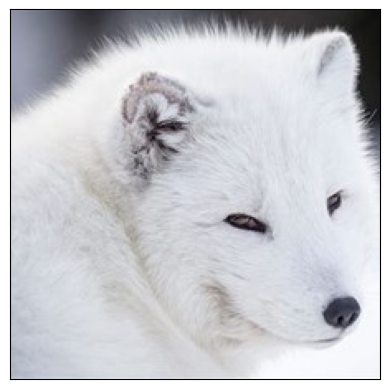

In [13]:
# Lets load the Artic fox image sample from the images the model was not trained on
x = image.load_img('Data/arctic-wildlife/samples/arctic_fox/arctic_fox_140.jpeg', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [14]:
# lets preprocess and run thru the ResNet feature extraction layer and then run the output throught the newly trained classification layers
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step   
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step
artic fox: 1.0
polar bear: 0.0
walrus: 0.0


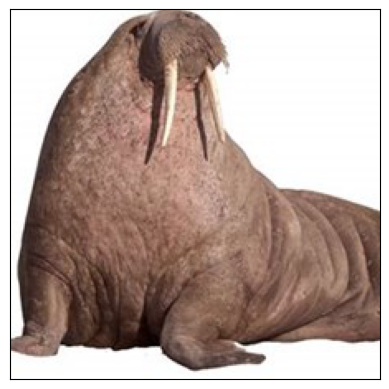

In [15]:
# lets load walrus image
x = image.load_img('Data/arctic-wildlife/samples/walrus/walrus_143.png', target_size=(224, 224))
plt.xticks([])
plt.yticks([])
plt.imshow(x)

In [16]:
# lets preprocess and run thru the ResNet feature extraction layer and then run the output throught the newly trained classification layers
x = image.img_to_array(x)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x) / 255

y = base_model.predict(x)
predictions = model.predict(y)

for i, label in enumerate(class_labels):
    print(f'{label}: {predictions[0][i]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
artic fox: 0.0
polar bear: 0.0
walrus: 1.0
